## PROGRAMMING ASSIGNMENT 4
Professor: Dr. Liao

by Khanh Nguyen

Semantic Role Labeler (SRL)
In this assignment, you will build a semantic role labeler. Many, in fact all, aspects of the system you will develop are left up to you. You can solve this task with neural or traditional ML approaches. To set up your system, first download datafile data.wsj.zip from blackboard under assignment 4, and then go to the following website https://www.cs.upc.edu/~srlconll/soft.html where you will find the goal and description of this homework, the documentation of each data file in the data.wsj.zip file and scripts you will need to use such as srl-eval.pl(https://www.cs.upc.edu/~srlconll/srl-eval.pl) as attached on
Blackboard. Here, we summarize the highlights from the documentation. However, we recommended that you go to the website and read through the details as well.
Please use the data.wsj.zip from the blackboard and NOT the version on the website. With the exception of this detail, the information on the website and in this document are consistent.
Dataset for this assignment consists of sentences taken from the Wall Street Journal. In the data.wsj.zip file, you can find folders corresponding to words, targets, synt.cha, synt.upc, synt.col2h, synt.col2, props, and ne. Each folder has one test file and one training file. Files ending with .train will be used to train your model, .test files will be used to test your model.

In each of the files, all the words are stored in vertical format: words are separated by one newline and sentences are separated by two newlines. Folder ‘word’ has one column with English words. ‘targets’ folder has one column with the base form of verbs. Any words that are not targets are marked with ‘-‘.
Training and test files in ‘ne’ have one column with named entities (Location, person, Organization, miscellaneous). Start of a named entity is indicated with round bracket ‘(‘, middles are only filled with * that is just a space filler, and the end of the label is indicated with the round bracket ‘)’.
 All four folders with ‘synt’ have part of speech tags(PoS) tags of each word listed in the ‘words’ files and full parses created with different methods. You can choose the one synt folder among those four folders to train
and test your model, and justify why you chose the folder at the start of the code. ‘props’ folder has target verbs in the first column (same as data in ‘targets’ folder) and semantic roles for each word in the rest of the columns: The rest of the columns are the ones you are ‘Predicting’ with your classifier.
 See section on “Generating Output” for more details on the format of this file. All training files have exactly the same number of lines, and all test files have exactly the same number lines. Thus, if you want to search the named entity tag of a word written in first line of file ‘test.wsj.words.train’, you can find it in ‘test.wsj.ne.train’ in the first line in ne folder.
You can also find a perl script(srl-eval.pl) on the blackboard that you can use to evaluate with test.wsj.props.test file that is in the ‘props’ folder. This script will compute accuracy based on test.wsj.props.test file and your model output that should. have the exact same format with test.wsj.props.test file.
Your task is to tackle semantic role labeling tasks on your own, with design and implementation decisions that you justify based on what you learned in class.
Generating Input: You can create your own input files with the following command, you can create your own script instead of using the following command inside the unzipped provided data folder:
Command to create training input file:
paste -d ' ' [list of files you want to use] > train-file.txt
For example, if you want to paste words, synt.cha, ne, targets and props file with a space and create
‘train-file.txt’ in the same folder, the command will look like below

paste -d ' ' words/test.wsj.words.train synt.cha/test.wsj.synt.cha.train
ne/test.wsj.ne.train targets/test.wsj.targets.train props/test.wsj.props.train > train-file.txt

If you replace .train to .test, you can create the test file. Following command is to create testing input file is as below:

paste -d ' ' [list of files you want to use]> test-file.txt

Example usage is like below.

paste -d ' ' words/test.wsj.words.test synt.cha/test.wsj.synt.cha.test ne/test.wsj.ne. test targets/test.wsj.targets.test props/test.wsj.props.test > test-file.txt

You can change synt.cha with different syntax such as synt.upc, synt.col2, synt.col2h. Synt.cha has PoS and parser using a method created by Eugene Charniak. Synt.col2 has PoS tags and full parses of Collins', with WSJ-style Non-Terminals. Synt.col2h has PoS tags and full parses of Collins', with Collins-style NonTerminals (include lexical heads and enriched tags). synt.upc has PoS tags, and partial parses by the UPC processors. Detailed descriptions and related papers are also provided at the website which may help
you choose what syntax you want for your system.

Generating Output: With given features and target verb, you will generate the semantic role in a format same as "props/test.wsj.props.test " file (first column: target verbs, non-verbs should be replaced with “-” that is a space filler; remaining columns: arguments of each target verb). Number of remaining
columns are same as target verbs in the sentence. If one sentence contains 4 target verbs, your output should have 5 columns: one column with target verbs and ‘-’, and the following columns with semantic roles for each verb. Start of semantic role label is indicated with a round bracket ‘(‘, middle is filled with * that is just a filler, and end of the label is indicated with the round bracket ‘)’. In the props file, the (core) arguments are labeled by numbers (I.e. A0:acceptor, A1:thing accepted, A2:accepted-from,
A3:attribute), Adjunct-like arguments are labeled as AM-LOC(locative), TMP(temporal), EXT(extent), CAU(cause), DIR(directional), ADV(adjectival), MNR(manner), NEG(negation), MOD(modal), DIS(discourse) and etc.

If you want to know more details of each label, please check the following website:
https://verbs.colorado.edu/~mpalmer/projects/ace/PBguidelines.pdf
Machine Behavior Example: The expected output for given input for training and testing are shown
below.

[Training] Example training input is as follows. This input contains two targets. The last column shows the semantic roles of the verb “harp”, second to the last column is for the verb “think”. Your goal is to predict the last two columns using columns 1-5 as input. For this specific example, you will be predicting those 2 last columns since we have 2 target verbs within the sentence.
One possible method to deal with this situation would be to create 2 input sentences for each target verb. To extract features, you can append features you selected and train the vectors with the built-in functions of the deep learning library you are using, same for labels. If you used other methods, please state that at the beginning of your code. You can consider this as a multi-label classification task like HW3, so the number of output nodes of your neural nets for each word will be same as number of labels you predicted (as in A0, V, A1, AM-MOD and etc). You can choose to use any type of neural net you
want such as bi-lstm, lstm, rnn, or other traditional ML techniques. Please make sure to state what you are using and why you are using it. During the training process, you are required to generate a graph with loss values calculated with the training set and test set. With the graph you have, please tune your parameters based on the graph. Please state in your code how you validated your model.

[Testing] Once you finish training, you will be using all columns except the last column as an input of the testing process. Use the same method to extract features you used to train. Last columns (semantic role columns) are labels you are predicting.

[Post Processing] To evaluate your system, you will be using the srl-eval.pl file as mentioned in “Evaluation” section. To use the script, you need to convert the predicted columns to the original props file format, which has the one target verb column (provided in targets file) and props (semantic roles
you predicted) as shown in the below image. If there are 2 different verbs in the sentence, and you created different input sequences for each verb, you will need to merge the separate outputs back into a single input sequence.

Documentation: Use the same documentation format from previous assignments. However, this time provides more extensive documentation on your machine learning algorithm of choice, features, and any other design decisions along with their justifications. Then, describe your code. As always, write a
short description of each function on top of it.

Evaluation: Evaluate your system output on test data using srl-eval.pl. The evaluation script (srleval.pl) expects two parameters: The first is the name of the file containing gold standard propositions ("props/test.wsj.props.test"); the second is the name of the file containing predicted propositions (your model output). This is the only place you should use test data. You must not touch it or look at it before your system is final. Any parameter tuning or architecture adjustment must be carried out on training data. Save your system output in a log file.

Deliverables: Submit a zip file named with student1[firstname initial][lastname]_student2[firstname
initial][lastname]_[hw#].zip (i.e. student 1 jamie lee, student 2 kahyun lee: jlee_klee_hw1.zip). Zip file
should include: Your code(s), models, model output, evaluation output with test data and loss values of
training set and validation set generated during training process in graph (.png or bmp or any format).
Give descriptive names to your models (if any). E.g., rnn_258_softmax… Indicate in the model name
your best model that produces the best output in the log file.

In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, SimpleRNN, LSTM, Dense

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, LSTM, Embedding, Dense, Bidirectional
from keras.preprocessing.sequence import pad_sequences

## DRAFT TEST CODE ON SHORT INPUT

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 8, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 11s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 56ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 39ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 38ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 36ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val

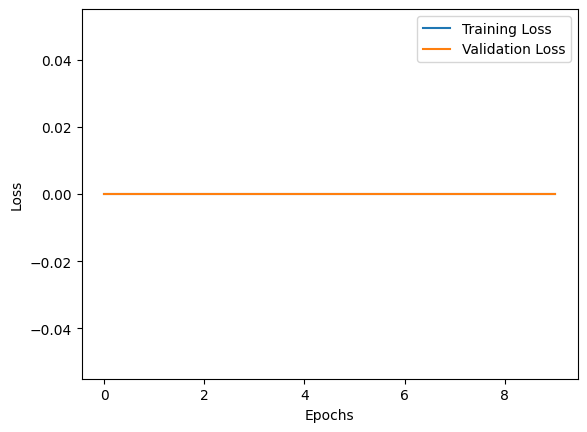

In [3]:
%%time

# Example training input
training_input = """
And                            CC            (S1(S*           *    -      -                       *               *
I                              PRP             (NP*)          *    -      -                    (A0*)              *
think                          VBP             (VP*           *    think  think                 (V*)              *
a                              DT    (SBAR(S(NP(NP*           *    -      -                    (A1*            (A0*
lot                            NN                 *)          *    -      -                       *               *
of                             IN              (PP*           *    -      -                       *               *
people                         NNS             (NP*)))        *    -      -                       *               *)
will                           MD              (VP*           *    -      -                       *        (AM-MOD*)
harp                           VB              (VP*           *    harp   harp                    *             (V*)
on                             IN              (PP*           *    -      -                       *            (A1*
program                        NN              (NP*           *    -      -                       *               *
trading                        NN                 *)))))))    *    -      -                       *)              *)
.                              .                  *))         *    -      -                       *               *
"""

# Preprocess the training input
sentences = [line.split() for line in training_input.split('\n') if line.strip()]
max_len = max(len(sentence) for sentence in sentences)
word_to_index = {}
index_to_word = {}
labels = []

for sentence in sentences:
    for i, word_label in enumerate(sentence):
        if '/' in word_label:
            word, label = word_label.split('/')
        else:
            word = word_label
            label = 'O'  # Default label if no label is specified
        if word not in word_to_index:
            word_to_index[word] = len(word_to_index)
            index_to_word[len(index_to_word)] = word
        sentence[i] = word_to_index[word]
        labels.append(label)

num_labels = len(set(labels))
label_to_index = {label: i for i, label in enumerate(set(labels))}
index_to_label = {i: label for label, i in label_to_index.items()}

X = pad_sequences(sentences, maxlen=max_len)
y = np.zeros((len(sentences), max_len, num_labels))
for i, sentence in enumerate(sentences):
    for j, word_index in enumerate(sentence):
        label = labels[i * max_len + j]
        y[i, j, label_to_index[label]] = 1

# Define the model
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=len(word_to_index), output_dim=100)(input_layer)
lstm_layer = Bidirectional(LSTM(100, return_sequences=True))(embedding_layer)
output_layer = Dense(num_labels, activation='softmax')(lstm_layer)
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=10, batch_size=32)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, LSTM, Embedding, Dense, Bidirectional
from keras.preprocessing.sequence import pad_sequences

Epoch 1/10
887/887 [==============================] - 18s 16ms/step - loss: 0.0981 - accuracy: 0.6027 - val_loss: 0.0924 - val_accuracy: 0.6090
Epoch 2/10
887/887 [==============================] - 9s 10ms/step - loss: 0.0977 - accuracy: 0.5968 - val_loss: 0.1055 - val_accuracy: 0.6089
Epoch 3/10
887/887 [==============================] - 8s 9ms/step - loss: 0.1001 - accuracy: 0.5968 - val_loss: 0.1003 - val_accuracy: 0.6089
Epoch 4/10
887/887 [==============================] - 8s 9ms/step - loss: 0.0990 - accuracy: 0.5967 - val_loss: 0.0955 - val_accuracy: 0.6089
Epoch 5/10
887/887 [==============================] - 9s 10ms/step - loss: 0.0983 - accuracy: 0.5967 - val_loss: 0.1012 - val_accuracy: 0.6089
Epoch 6/10
887/887 [==============================] - 8s 9ms/step - loss: 0.0974 - accuracy: 0.5967 - val_loss: 0.0954 - val_accuracy: 0.6089
Epoch 7/10
887/887 [==============================] - 7s 8ms/step - loss: 0.0966 - accuracy: 0.5967 - val_loss: 0.1029 - val_accuracy: 0.6089
Ep

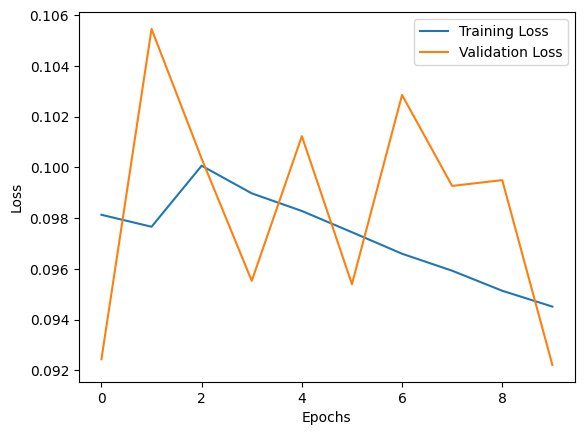

CPU times: user 1min 46s, sys: 9.01 s, total: 1min 55s
Wall time: 1min 33s


In [7]:
%%time

# Read input from file
with open("train-file.txt", "r") as file:
    lines = file.readlines()

# Preprocess the training input
sentences = []
labels = []
for line in lines:
    words_labels = line.strip().split()
    sentence = []
    sentence_labels = []
    for word_label in words_labels:
        if '/' in word_label:
            word, label = word_label.split('/')
        else:
            word = word_label
            label = 'O'  # Default label if no label is specified
        sentence.append(word)
        sentence_labels.append(label)
    sentences.append(sentence)
    labels.append(sentence_labels)

# Get max sentence length
max_len = max(len(sentence) for sentence in sentences)

# Build word_to_index and index_to_word dictionaries
word_to_index = {}
index_to_word = {}
for sentence in sentences:
    for word in sentence:
        if word not in word_to_index:
            word_to_index[word] = len(word_to_index)
            index_to_word[len(index_to_word)] = word

# Build label_to_index and index_to_label dictionaries
all_labels = [label for sentence_labels in labels for label in sentence_labels]
num_labels = len(set(all_labels))
label_to_index = {label: i for i, label in enumerate(set(all_labels))}
index_to_label = {i: label for label, i in label_to_index.items()}

# Convert sentences and labels to indices
X = [[word_to_index[word] for word in sentence] for sentence in sentences]
y = np.zeros((len(sentences), max_len, num_labels))
for i, sentence_labels in enumerate(labels):
    for j, label in enumerate(sentence_labels):
        y[i, j, label_to_index[label]] = 1

# Pad sequences
X = pad_sequences(X, maxlen=max_len)

# Define the model
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=len(word_to_index), output_dim=100)(input_layer)
lstm_layer = Bidirectional(LSTM(100, return_sequences=True))(embedding_layer)
output_layer = Dense(num_labels, activation='softmax')(lstm_layer)
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=10, batch_size=32)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/10
887/887 [==============================] - 17s 15ms/step - loss: 0.0856 - accuracy: 0.5962 - val_loss: 0.0938 - val_accuracy: 0.6089
Epoch 2/10
887/887 [==============================] - 8s 10ms/step - loss: 0.0863 - accuracy: 0.5967 - val_loss: 0.0861 - val_accuracy: 0.6089
Epoch 3/10
887/887 [==============================] - 7s 8ms/step - loss: 0.1175 - accuracy: 0.5967 - val_loss: 0.1247 - val_accuracy: 0.6089
Epoch 4/10
887/887 [==============================] - 9s 10ms/step - loss: 0.1215 - accuracy: 0.5967 - val_loss: 0.1240 - val_accuracy: 0.6089
Epoch 5/10
887/887 [==============================] - 8s 9ms/step - loss: 0.1199 - accuracy: 0.5967 - val_loss: 0.1188 - val_accuracy: 0.6089
Epoch 6/10
887/887 [==============================] - 8s 9ms/step - loss: 0.1188 - accuracy: 0.5967 - val_loss: 0.1227 - val_accuracy: 0.6089
Epoch 7/10
887/887 [==============================] - 9s 10ms/step - loss: 0.1179 - accuracy: 0.5967 - val_loss: 0.1190 - val_accuracy: 0.6089
E

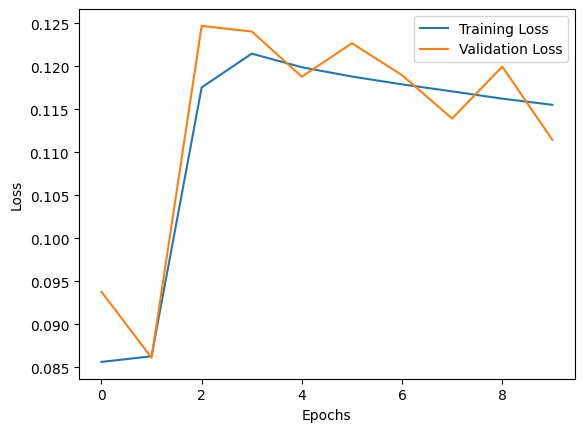

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
%%time
# Read input from file
with open("train-file.txt", "r") as file:
    lines = file.readlines()

# Preprocess the training input
sentences = []
labels = []
for line in lines:
    words_labels = line.strip().split()
    sentence = []
    sentence_labels = []
    for word_label in words_labels:
        if '/' in word_label:
            word, label = word_label.split('/')
        else:
            word = word_label
            label = 'O'  # Default label if no label is specified
        sentence.append(word)
        sentence_labels.append(label)
    sentences.append(sentence)
    labels.append(sentence_labels)

# Get max sentence length
max_len = max(len(sentence) for sentence in sentences)

# Build word_to_index and index_to_word dictionaries
word_to_index = {}
index_to_word = {}
for sentence in sentences:
    for word in sentence:
        if word not in word_to_index:
            word_to_index[word] = len(word_to_index)
            index_to_word[len(index_to_word)] = word

# Build label_to_index and index_to_label dictionaries
all_labels = [label for sentence_labels in labels for label in sentence_labels]
num_labels = len(set(all_labels))
label_to_index = {label: i for i, label in enumerate(set(all_labels))}
index_to_label = {i: label for label, i in label_to_index.items()}

# Convert sentences and labels to indices
X = [[word_to_index[word] for word in sentence] for sentence in sentences]
y = np.zeros((len(sentences), max_len, num_labels))
for i, sentence_labels in enumerate(labels):
    for j, label in enumerate(sentence_labels):
        y[i, j, label_to_index[label]] = 1

# Pad sequences
X = pad_sequences(X, maxlen=max_len)

# Define the model
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=len(word_to_index), output_dim=100)(input_layer)
lstm_layer = Bidirectional(LSTM(100, return_sequences=True))(embedding_layer)
output_layer = Dense(num_labels, activation='softmax')(lstm_layer)
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=10, batch_size=32)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the trained model
model.save("trained_model.h5")


## GENERATING OUTPUT FILE FROM THE "test-file.txt"

In [41]:
# Open the input file for reading
with open('test.wsj.props.test.txt', 'r') as file:
    lines = file.readlines()

# Process each line to replace multiple consecutive space characters with a single space character
modified_lines = []
for line in lines:
    modified_lines.append(' '.join(line.split()) + '\n')  # Append newline character to preserve line breaks

# Open the output file for writing and overwrite its content with the modified lines
with open('test_wsj_props_test.txt', 'w') as file:
    file.writelines(modified_lines)


In [48]:
import numpy as np
from keras.models import Model
from keras.layers import Input, LSTM, Embedding, Dense, Bidirectional
from keras.preprocessing.sequence import pad_sequences

# Load test file
with open("test_wsj_props_test.txt", "r") as file:
    test_input = file.read()

# Preprocess the test input
test_sentences = [line.split() for line in test_input.split('\n') if line.strip()]
test_max_len = max(len(sentence) for sentence in test_sentences)

# Convert test sentences to indices
test_X = []
for sentence in test_sentences:
    indices = []
    for word in sentence:
        if word in word_to_index:
            indices.append(word_to_index[word])
        else:
            indices.append(0)  # Use index 0 for out-of-vocabulary words
    test_X.append(indices)

# Pad sequences
test_X = pad_sequences(test_X, maxlen=test_max_len)

# Define the model
input_layer = Input(shape=(test_max_len,))
embedding_layer = Embedding(input_dim=len(word_to_index), output_dim=100)(input_layer)
lstm_layer = Bidirectional(LSTM(100, return_sequences=True))(embedding_layer)
output_layer = Dense(num_labels, activation='softmax')(lstm_layer)
model = Model(inputs=input_layer, outputs=output_layer)

# Load trained weights
model.load_weights("trained_model.h5")

# Predict semantic roles
predicted_labels = model.predict(test_X)

# Convert predictions to semantic roles
predicted_roles = []
for i, sentence in enumerate(test_sentences):
    roles = []
    for j, word in enumerate(sentence):
        predicted_label_index = np.argmax(predicted_labels[i, j])
        predicted_label = index_to_label[predicted_label_index]
        roles.append(predicted_label)
    predicted_roles.append(roles)

# Write predictions to output file
with open("output-file.txt", "w") as output_file:
    for i, sentence in enumerate(test_sentences):
        # Write everything in the first column of the test file
        for word in sentence:
            output_file.write(f"{word} ")
        output_file.write('\n')
        # Write predictions for the rest of the columns
        verb_encountered = False
        for j, word in enumerate(sentence):
            if "V" in predicted_roles[i][j]:
                verb_encountered = True
                output_file.write(f"{word} {'*'} ")
            elif verb_encountered:
                output_file.write(f"{'*'} ")
            else:
                output_file.write(f"- {'*'} ")
        output_file.write("\n")


706/706 [==============================] - 3s 3ms/step


## TEST THE MODEL ON "test_wsj_props_test.txt" FILE

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the test file
with open("test_wsj_props_test.txt", "r") as file:
    test_input = file.read()

# Load the output file
with open("output-file.txt", "r") as file:
    output_input = file.read()

# Extract the semantic roles from the test file
test_sentences = [line.split()[1:] for line in test_input.split('\n') if line.strip()]
test_semantic_roles = [role for sentence in test_sentences for role in sentence]

# Extract the predicted semantic roles from the output file
output_sentences = [line.split()[1:] for line in output_input.split('\n') if line.strip()]
output_semantic_roles = [role for sentence in output_sentences for role in sentence]

# Calculate accuracy
correct_predictions = sum(1 for true_role, pred_role in zip(test_semantic_roles, output_semantic_roles) if true_role == pred_role)
total_predictions = len(test_semantic_roles)
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy}")

# Compute true positives, false positives, and false negatives
def compute_metrics(true_roles, pred_roles):
    true_positives = sum(1 for true_role, pred_role in zip(true_roles, pred_roles) if true_role == pred_role and true_role != '-')
    false_positives = sum(1 for true_role, pred_role in zip(true_roles, pred_roles) if true_role != pred_role and pred_role != '-' and true_role != '-')
    false_negatives = sum(1 for true_role, pred_role in zip(true_roles, pred_roles) if true_role != pred_role and pred_role == '-' and true_role != '-')
    return true_positives, false_positives, false_negatives

# Calculate precision, recall, and F1-score
def calculate_scores(true_roles, pred_roles):
    true_positives, false_positives, false_negatives = compute_metrics(true_roles, pred_roles)
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return precision, recall, f1

# Calculate evaluation metrics
precision, recall, f1 = calculate_scores(test_semantic_roles, output_semantic_roles)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.5156801922145918
Precision: 0.7298195752023752
Recall: 0.6373548444286854
F1-score: 0.6804604228034685


# DRAFT

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

# Load test file
with open("test.wsj.props.test", "r") as file:
    test_input = file.read()

# Preprocess the test input
test_sentences = [line.split() for line in test_input.split('\n') if line.strip()]
test_max_len = max(len(sentence) for sentence in test_sentences)

# Convert test sentences to indices
test_X = []
for sentence in test_sentences:
    indices = []
    for word in sentence:
        if word in word_to_index:
            indices.append(word_to_index[word])
        else:
            indices.append(0)  # Use index 0 for out-of-vocabulary words
    test_X.append(indices)

# Pad sequences to match the expected input shape of the model
test_X = pad_sequences(test_X, maxlen=14)  # Assuming the model expects input sequences of length 14

# Load trained model
model = load_model("trained_model.h5")

# Predict semantic roles
predicted_labels = model.predict(test_X)

# Convert predictions to semantic roles
predicted_roles = []
for i in range(len(test_sentences)):
    roles = []
    for j in range(len(test_sentences[i])):
        predicted_label_index = np.argmax(predicted_labels[i, j])
        predicted_label = index_to_label[predicted_label_index]
        roles.append(predicted_label)
    predicted_roles.append(roles)

# Flatten the predicted roles list
predicted_roles_flat = [role for sentence_roles in predicted_roles for role in sentence_roles]

# Create a list of placeholder labels for evaluation
# Replace 'unknown' with the appropriate label if available
ground_truth_labels = ['unknown'] * len(predicted_roles_flat)

# Evaluate performance using classification report
report = classification_report(ground_truth_labels, predicted_roles_flat)

print(report)


706/706 [==============================] - 3s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           O       0.00      0.00      0.00       0.0
     unknown       0.00      0.00      0.00   78359.0

    accuracy                           0.00   78359.0
   macro avg       0.00      0.00      0.00   78359.0
weighted avg       0.00      0.00      0.00   78359.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.